In [1]:
import Scribe as sc
from Scribe.Scribe import causal_net_dynamics_coupling as Scribe

import scanpy as sp

import pandas as pd
import numpy as np 

import networkx as nx 
nx.__version__

import matplotlib.pyplot as plt
import re

In [2]:
tot_RNA = pd.read_csv('https://www.dropbox.com/s/skgesrran9d48oy/emat_tot.txt?dl=1', index_col=0, delimiter='\s')
new_RNA = pd.read_csv('https://www.dropbox.com/s/kz0xj8hw4tbab9r/smat_new.txt?dl=1', index_col=0, delimiter='\s')

FD = pd.DataFrame({'gene_short_name': new_RNA.index}, columns=['gene_short_name'])
FD = FD.set_index('gene_short_name')

from anndata import AnnData
adata_sc_slamseq_MCMV = AnnData(tot_RNA.values.T,
    var = FD, 
    layers=dict(
        unspliced=new_RNA.values.T,
        spliced = tot_RNA.values.T)) 
adata_sc_slamseq_MCMV

# again, let annotate cells by virus infection
batch = list()

for cell in tot_RNA.columns.values:
    regex = re.compile('mock')
    result = regex.search(cell)
    if result is not None:
        label = 'mock'
    else:
        label = 'mcmv'
    batch.append(label)
    
# add it to the vlm object
adata_sc_slamseq_MCMV.obs['virus'] = np.array(batch)

adata_sc_slamseq_MCMV

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


AnnData object with n_obs × n_vars = 87 × 583 
    obs: 'virus'
    layers: 'unspliced', 'spliced'

In [3]:
import scvelo as scv 

scv.pp.filter_and_normalize(adata_sc_slamseq_MCMV, min_counts=1, min_counts_u=1, n_top_genes=583)
scv.pp.moments(adata_sc_slamseq_MCMV, n_pcs = 10, n_neighbors = 15, mode = 'distances') # 
scv.tl.velocity(adata_sc_slamseq_MCMV)
scv.tl.velocity_graph(adata_sc_slamseq_MCMV)


/home/xqiu/.local/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning


Filtered out 19 genes that are detected in less than 1 counts (unspliced).
Skip filtering by dispersion since number of variables are less than `n_top_genes`
Logarithmized X.
computing neighbors


/home/xqiu/.local/lib/python3.6/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../.local/lib/python3.6/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/xqiu/.local/lib/python3.6/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../.local/lib/python3.6/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/xqiu/.local/lib/python3.6/site-packages/numba/compiler.py:751: NumbaDeprecationWarning: 
Fall-back from the nopython compilati

    finished (0:00:03) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on distances
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [4]:
import Scribe as sc
adata_sc_slamseq_MCMV.var[adata_sc_slamseq_MCMV.var.index.isin(["Isg15", "Ifitm3", "Cxcl10", "Irf2", "Irf7", "Irf8", "Irf3", "Nfkb1", "Rela"])]


,velocity_gamma,velocity_r2,velocity_genes
gene_short_name,,,
Cxcl10,0.998857,0.999636,True
Ifitm3,0.837056,-1.264982,False
Isg15,0.938828,0.972336,True
Nfkb1,0.896247,0.884857,True
Rela,0.952683,0.943685,True


Create causal_model successfully


/home/xqiu/.local/lib/python3.6/site-packages/Scribe/causal_network.py:18: UserWarning:  WARNING: No expression data argument given. if you intend to load the data from a file, call the method 'read_expression_file'.
  if expression==None: warnings.warn(" WARNING: No expression data argument given. if you intend to load the data from a file, call the method 'read_expression_file'.")


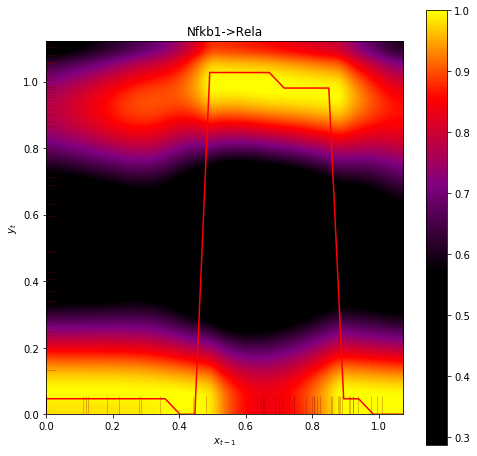

In [5]:
sc.pl.viz_response(adata_sc_slamseq_MCMV, np.array([['Nfkb1','Rela']]),grid_num=25, log=True) # 


Create causal_model successfully


/home/xqiu/.local/lib/python3.6/site-packages/Scribe/plot/heatmaps.py:394: RuntimeWarning: invalid value encountered in true_divide
  u = np.exp(-dist_mat[i, 1:] / np.min(dist_mat[i, 1:]))


f_ini_ind is  0   25


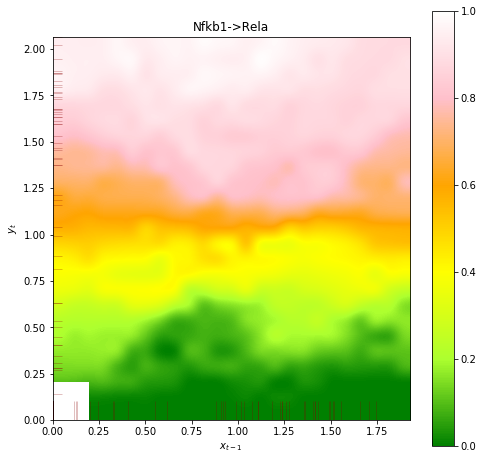

In [6]:
sc.pl.viz_causality(adata_sc_slamseq_MCMV,np.array([['Nfkb1','Rela']]),grid_num=25, log=False)


Create causal_model successfully


/home/xqiu/.local/lib/python3.6/site-packages/Scribe/plot/heatmaps.py:551: RuntimeWarning: invalid value encountered in true_divide
  u = np.exp(-dist_mat[i, 1:] / np.min(dist_mat[i, 1:]))


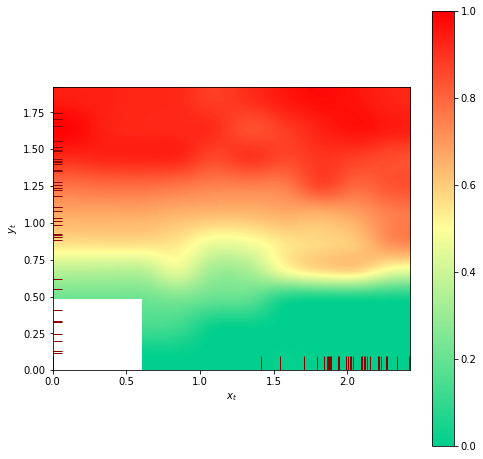

In [7]:
sc.pl.viz_comb_logic(adata_sc_slamseq_MCMV,np.array([['Isg15','Nfkb1', 'Rela']]),grid_num=10, log=False)


In [8]:
# subset the Nf-kb gene set 
Nf_kb_genes = pd.read_csv('/home/xqiu/proj/slam_seq/scSLAM-seq/sc3SLAM/07_if_nfkb/hinata.nfkb.up.genes', header=None)
If_genes = pd.read_csv('/home/xqiu/proj/slam_seq/scSLAM-seq/sc3SLAM/07_if_nfkb/if_induced.txt', header=None)

print(Nf_kb_genes.head(), If_genes.head())

         0
0    ABCC1
1  ADAMTS3
2   ANXA13
3    AP2B1
4     ARF6         0
0   Ifit1
1   Ifit3
2  Cxcl10
3    Tgtp
4   Tgtp2


In [9]:
adata_sc_slamseq_MCMV.var_names


Index(['1700066M21Rik', '2310039H08Rik', '2700097O09Rik', '2810032G03Rik',
       '3110001I22Rik', '4632404H12Rik', '4930590J08Rik', '5930430L01Rik',
       '6720489N17Rik', '9130008F23Rik',
       ...
       'Zfp580', 'Zfp667', 'Zfp707', 'Zfp709', 'Zfp830', 'Zfp949', 'Zfp952',
       'Zfp953', 'Zkscan8', 'Znfx1'],
      dtype='object', name='gene_short_name', length=564)

In [10]:
valid_Nf_kb_genes = set([i.capitalize() for i in Nf_kb_genes[0].values]).intersection(set(adata_sc_slamseq_MCMV.var_names))
valid_If_genes = set([i.capitalize() for i in If_genes[0].values]).intersection(set(adata_sc_slamseq_MCMV.var_names))

print(len(valid_Nf_kb_genes), len(Nf_kb_genes))
print(len(valid_If_genes), len(If_genes))


16 84
39 294


In [11]:
adata_Nf_kb_subset = adata_sc_slamseq_MCMV[:, list(valid_Nf_kb_genes)].copy()
adata_If_subset = adata_sc_slamseq_MCMV[:, list(valid_If_genes)].copy()


In [12]:
adata_Nf_kb_subset.var_names

Index(['Nfkb1', 'Rela', 'Irf1', 'Ier3', 'Sod2', 'Tnfaip3', 'Nfkb2', 'Ptx3',
       'Icam1', 'Nfkbia', 'Relb', 'Cxcl1', 'Ccl2', 'Serpine1', 'Gch1', 'Il6'],
      dtype='object', name='gene_short_name')

In [13]:
Scribe(adata_Nf_kb_subset, t0_key='spliced', t1_key='unspliced')
Scribe(adata_If_subset, t0_key='spliced', t1_key='unspliced')


/home/xqiu/.local/lib/python3.6/site-packages/Scribe/plot/networks.py:33: RuntimeWarning: invalid value encountered in less
  ind_mat = np.where(df_mat.values - df_mat.T.values < 0)
/home/xqiu/.local/lib/python3.6/site-packages/Scribe/plot/networks.py:35: RuntimeWarning: invalid value encountered in less
  tmp = np.where(df_mat.values - df_mat.T.values < 0)


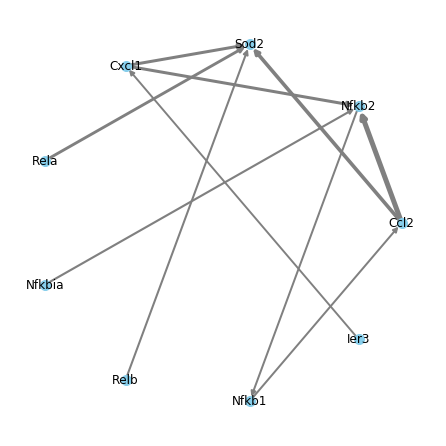

In [14]:
sc.pl.vis_causal_net(adata_Nf_kb_subset, figsize=[6, 6], layout='circular')

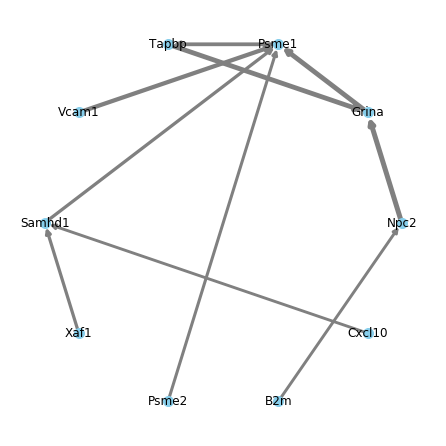

In [15]:
sc.pl.vis_causal_net(adata_If_subset, figsize=[6, 6], layout='circular')